<a href="https://colab.research.google.com/github/samuelchurch1/PythonAssignment/blob/main/v3_Python_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the pandas library for data manipulation
import pandas as pd
# Install the openpyxl library to enable reading/writing Excel files (e.g., .xlsx) in pandas
!pip install openpyxl
# Ended up using CSV file

In [ ]:
# Import the drive module from google.colab to mount Google Drive for file access
from google.colab import drive
# Mount Google Drive to the "/content/drive" directory, forcing a remount to refresh the connection or access updated files
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# Upload the Knowledge CSV file to Google Colab
file_path = '/content/drive/MyDrive/PYTHON/Knowledge3.csv'
# Read the Knowledge CSV file into a Dataframe
df = pd.read_csv(file_path)
# Display the first five rows of the Knowledge dataframe
print(df.head())

      MS  Graduates of tertiary education (%) W  \
0  EU-28                                   28.0   
1     BE                                   36.0   
2     BG                                   27.0   
3     CZ                                   22.0   
4     DK                                   37.0   

   Graduates of tertiary education (%) M  \
0                                   26.0   
1                                   31.0   
2                                   20.0   
3                                   19.0   
4                                   28.0   

   People participating in formal or non-formal education (%) W  \
0                                               20.0              
1                                               21.0              
2                                               10.0              
3                                               17.0              
4                                               38.0              

   People participating i

In [ ]:
# Drop the specific columns from the Knowledge Dataframe that are unnecessary for our research question
df = df.drop(['Graduates of tertiary education (%) M',
              'People participating in formal or non-formal education (%) W',
              'People participating in formal or non-formal education (%) M',
              'Tertiary students in education, health and welfare, humanities and arts (%) W',
              'Tertiary students in education, health and welfare, humanities and arts (%) M'], axis=1)
# Drop the columns with NaN values
df = df.drop(columns=df.loc[:, 'Unnamed: 7':'Unnamed: 1023'].columns)
# Display the first five rows of the cleaned Knowledge Dataframe with only the MS and Graduates of tertiary education (%) W
print(df.head())

      MS  Graduates of tertiary education (%) W
0  EU-28                                   28.0
1     BE                                   36.0
2     BG                                   27.0
3     CZ                                   22.0
4     DK                                   37.0


In [ ]:
# Upload the Power CSV file to Google Colab
file_path2 = '/content/drive/MyDrive/PYTHON/Power3.csv'
# Read the Power CSV file into a Dataframe
df2 = pd.read_csv(file_path2)
# Display the first five rows of the Power dataframe
print(df2.head())

      MS  Share of ministers (%) W  Share of ministers (%) M  \
0  EU-28                      35.0                      65.0   
1     BE                      55.0                      45.0   
2     BG                      33.0                      68.0   
3     CZ                      11.0                      89.0   
4     DK                      35.0                      65.0   

   Share of members of parliament (%) W  Share of members of parliament (%) M  \
0                                  33.0                                  67.0   
1                                  43.0                                  57.0   
2                                  24.0                                  76.0   
3                                  24.0                                  76.0   
4                                  44.0                                  56.0   

   Share of members of regional assemblies (%) W  \
0                                           31.0   
1                       

In [ ]:
# Drop the specific columns from the Power Dataframe that are unnecessary for our research question
df2 = df2.drop(['Share of ministers (%) M',
                'Share of members of parliament (%) M',
                'Share of members of regional assemblies (%) W',
                'Share of members of regional assemblies (%) M',
                'Share of members of boards in largest quoted companies, supervisory board or board of directors (%) W',
                'Share of members of boards in largest quoted companies, supervisory board or board of directors (%) M',
                'Share of board members of central bank (%) W', 'Share of board members of central bank (%) M',
                'Share of board members of research funding organisations (%) W',
                'Share of board members of research funding organisations (%) M',
                'Share of board members of publically owned broadcasting organisations (%)  W',
                'Share of board members of publically owned broadcasting organisations (%)  M',
                'Share of members of highest decision making body of the national Olympic sport organisations (%)  W',
                'Share of members of highest decision making body of the national Olympic sport organisations (%)  M'], axis=1)
# Drop the columns with NaN values
df2 = df2.drop(columns=df2.loc[:, 'Unnamed: 17':'Unnamed: 1023'].columns)
# Display the first five rows of the cleaned Power Dataframe with only the MS, Share of ministers (%) W, and Share of members of parliament (%) W
print(df2.head())

      MS  Share of ministers (%) W  Share of members of parliament (%) W
0  EU-28                      35.0                                  33.0
1     BE                      55.0                                  43.0
2     BG                      33.0                                  24.0
3     CZ                      11.0                                  24.0
4     DK                      35.0                                  44.0


In [ ]:
# Import necessary libraries

import matplotlib.pyplot as plt # Import the matplotlib library for plotting
import seaborn as sns # Import the seaborn library for advanced visualizations
import numpy as np # Import the NumPy library for numerical operations on arrays

In [1]:
# Identify how many rows there are in both Dataframes
print("len df:", len(df))
print("len df2:", len(df2))

# Found there are extra rows on Knowledge Dataframe that are empty

# Delete (empty) rows where 'column_name' is '28', '29', or '30'
df = df.drop([28, 29, 30])

# Now errors because these columns are now empty and thus cannot be found to be -deleted

NameError: name 'df' is not defined

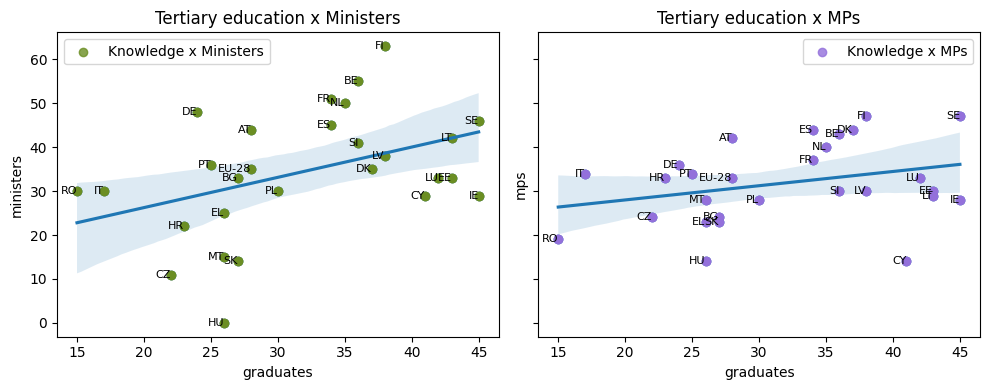

In [ ]:
# Build a combined DataFrame of the Knowledge and Poer Dataframes
combined = pd.concat([df['Graduates of tertiary education (%) W'],
        df2['Share of ministers (%) W'],
        df2['Share of members of parliament (%) W'],
        df['MS']], axis=1)

# Rename the columns with easier terms
combined.columns = ['graduates', 'ministers', 'mps', 'MS']

# Create a figure with two side-by-side subplots (1 row, 2 columns), sharing the x and y axes, and set the figure size to (10, 4) inches
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)



# Scatter plot 1 for 'graduates' vs 'ministers' on the first subplot (ax1)
# with 80% opacity, 'olivedrab' color, and a label for the legend
ax1.scatter(combined['graduates'], combined['ministers'],
            alpha=0.8, color = 'olivedrab', label='Knowledge x Ministers')
ax1.set_title('Tertiary education x Ministers') # Title the scatterplot 1
ax1.set_xlabel('Graduates of tertiary education (%) W') # X label
ax1.set_ylabel('Share of ministers (%) W') # Y label

# Plot a regression line for 'graduates' vs 'ministers' on the first subplot (ax1)
sns.regplot(x='graduates',
            y='ministers',
            data=combined, ax=ax1)
# Overlay a scatter plot of the same data points on ax1, using 'olivedrab' color
ax1.scatter(combined['graduates'], combined['ministers'], color = 'olivedrab')
# Add a legend to the first subplot (ax1)
ax1.legend()



# Scatter plot 2 for 'graduates' vs 'mps' on the second subplot (ax2)
# with 80% opacity, 'mediumpurple' color, and a label for the legend
ax2.scatter(combined['graduates'], combined['mps'],
            alpha=0.8, color = 'mediumpurple', label='Knowledge x MPs')
ax2.set_title('Tertiary education x MPs') # Title the scatterplot 2
ax2.set_xlabel('Graduates of tertiary education (%) W') # X label
ax2.set_ylabel('Share of members of parliament (%) W') # Y label

# Plot a regression line for 'graduates' vs 'mps' on the second subplot (ax2)
sns.regplot(x='graduates',
            y='mps',
            data=combined, ax=ax2)
# Overlay a scatter plot of the same data points on ax2, using 'mediumpurple' color
ax2.scatter(combined['graduates'], combined['mps'],
            color = 'mediumpurple')
# Add a legend to the second subplot (ax2)
ax2.legend()


# Annotate each data point in both subplots (ax1 and ax2) with the 'MS' value,
# positioning the text to the right of the point and vertically centered,
# using a font size of 8 for readability
for _, row in combined.iterrows():
    ax1.text(row['graduates'], row['ministers'], row['MS'],
             fontsize=8, ha='right', va='center')
    ax2.text(row['graduates'], row['mps'], row['MS'],
             fontsize=8, ha='right', va='center')


# Adjusts spacing to prevent overlapping plot elements
plt.tight_layout()
# Display the two scatterplots
plt.show()

In [ ]:
import sklearn # Import library for data analysis and modeling
from sklearn.linear_model import LinearRegression # Linear regression model for predicting continuous values
from sklearn.model_selection import train_test_split # Splits data into training and testing sets
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Evaluation metrics for regression performance
import statsmodels.api as sm # Statistical modeling library

# Define features and target variable
x = combined[['graduates']]  # independent variable
y1 = combined['ministers']   # dependent variable 1
y2 = combined['mps']         # dependent variable 2

print(x)
print(y1)
print(y2)

In [ ]:
# Create and fit the model for 'graduates' and 'ministers'
model1 = LinearRegression()
model1.fit(x, y1)

LinearRegression()

In [ ]:
# Create and fit the model for 'graduates' and 'mps'
model2 = LinearRegression()
model2.fit(x, y2)

LinearRegression()

In [ ]:
# Check for intercept of model 1 (always True by default in sklearn LinearRegression())
print(model1.fit_intercept)

True


In [ ]:
# Check for intercept of model 2 (always True by default in sklearn LinearRegression())
print(model2.fit_intercept)

True


In [ ]:
# Display the model parameters
print(f"Intercept of Tertiary education x Ministers (β₀): {model1.intercept_:.2f}")
print(f"Coefficient of Tertiary education x Ministers (β₁): {model1.coef_[0]:.2f}")

Intercept of Education x Ministers (β₀): 12.46
Coefficient of Education x Ministers (β₁): 0.69


In [ ]:
# Display the model parameters
print(f"Intercept of Tertiary education x MPs (β₀): {model2.intercept_:.2f}")
print(f"Coefficient of Tertiary education x MPs (β₁): {model2.coef_[0]:.2f}")

Intercept of Education x MPs (β₀): 21.51
Coefficient of Education x MPs (β₁): 0.32
